In [ ]:
# Import necessary libraries
import pandas as pd
import talib

In [19]:
# Load the dataset from files
data_AAPL = pd.read_csv('../data/yfinance_data/yfinance_data/AAPL_historical_data.csv')
data_msft = pd.read_csv('../data/yfinance_data/yfinance_data/MSFT_historical_data.csv')
data_AMZN = pd.read_csv('../data/yfinance_data/yfinance_data/AMZN_historical_data.csv')
data_GOOG = pd.read_csv('../data/yfinance_data/yfinance_data/GOOG_historical_data.csv')
data_TSLA = pd.read_csv('../data/yfinance_data/yfinance_data/TSLA_historical_data.csv')
data_NVDA = pd.read_csv('../data/yfinance_data/yfinance_data/NVDA_historical_data.csv')
data_META = pd.read_csv('../data/yfinance_data/yfinance_data/META_historical_data.csv')

In [18]:
data_msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [17]:
# Clean and preview AAPL data
data_AAPL = data_AAPL[['Open', 'High', 'Low', 'Close', 'Volume']]
data_AAPL.dropna(inplace=True)
data_AAPL.head()

,Open,High,Low,Close,Volume
0,0.128348,0.128906,0.128348,0.128348,469033600
1,0.122210,0.122210,0.121652,0.121652,175884800
2,0.113281,0.113281,0.112723,0.112723,105728000
3,0.115513,0.116071,0.115513,0.115513,86441600
4,0.118862,0.119420,0.118862,0.118862,73449600


In [ ]:
# clean and preview MSFT data
data_msft = data_msft[['Open', 'High', 'Low', 'Close', 'Volume']]
data_msft.dropna(inplace=True)
data_msft.head()

In [ ]:
# clean and preview GOOG data
data_GOOG = data_GOOG[['Open', 'High', 'Low', 'Close', 'Volume']]
data_GOOG.dropna(inplace=True)
data_GOOG.head()

In [ ]:
# Clean and preview AMZN data
data_AMZN = data_AMZN[['Open', 'High', 'Low', 'Close', 'Volume']]
data_AMZN.dropna(inplace=True)
data_AMZN.head()

In [ ]:
# Clean and preview TSLA data
data_TSLA = data_TSLA[['Open', 'High', 'Low', 'Close', 'Volume']]
data_TSLA.dropna(inplace=True)
data_TSLA.head()

In [ ]:
# clea and preview NVDA data
data_NVDA = data_NVDA[['Open', 'High', 'Low', 'Close', 'Volume']]
data_NVDA.dropna(inplace=True)
data_NVDA.head()

In [ ]:
# clean and preview META data
data_META = data_META[['Open', 'High', 'Low', 'Close', 'Volume']]
data_META.dropna(inplace=True)
data_META.head()

# Apply Technical Indicators with TA-Lib

In [30]:
# Calculate indicators for Each Stock
def calculate_indicators(df):
    df['RSI'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(
        df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
    )
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)
    df['SMA_200'] = talib.SMA(df['Close'], timeperiod=200)
    df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
    df['Bollinger_High'], df['Bollinger_Mid'], df['Bollinger_Low'] = talib.BBANDS(
        df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0
    )
    return df

# Apply the indicator calculations to each stock's data
data_AAPL = calculate_indicators(data_AAPL)

# Chexk the calculated indicators for AAPL
data_AAPL[['Close', 'SMA_50', 'SMA_200', 'EMA_20', 'Bollinger_High', 'Bollinger_Mid', 'Bollinger_Low']].tail()

,Close,SMA_50,SMA_200,EMA_20,Bollinger_High,Bollinger_Mid,Bollinger_Low
10993,218.539993,208.474199,188.12235,222.376929,237.809121,224.228500,210.647878
10994,217.490005,209.098399,188.32235,221.911508,237.449323,224.440500,211.431677
10995,217.960007,209.709000,188.51720,221.535174,237.127285,224.633500,212.139714
10996,218.240005,210.279400,188.71645,221.221349,236.168590,225.014500,213.860411
10997,218.800003,210.858600,188.91145,220.990744,235.999799,225.117001,214.234202


In [31]:
# apply the indicator calculations to MSFT data
data_msft = calculate_indicators(data_msft)
# Check the calculated indicators for MSFT
data_msft[['Close', 'SMA_50', 'SMA_200', 'EMA_20', 'Bollinger_High', 'Bollinger_Mid', 'Bollinger_Low']].tail()

,Close,SMA_50,SMA_200,EMA_20,Bollinger_High,Bollinger_Mid,Bollinger_Low
9667,428.899994,438.804000,400.680651,446.197526,471.879834,451.887498,431.895163
9668,418.399994,438.897599,401.136351,443.550142,474.949525,450.199498,425.449471
9669,425.269989,439.071799,401.613600,441.809175,475.799161,448.820497,421.841833
9670,426.730011,439.144800,402.105300,440.373064,476.456626,447.809497,419.162368
9671,422.920013,439.183400,402.557800,438.710869,476.404456,446.118997,415.833538


## Visualize the Indicators

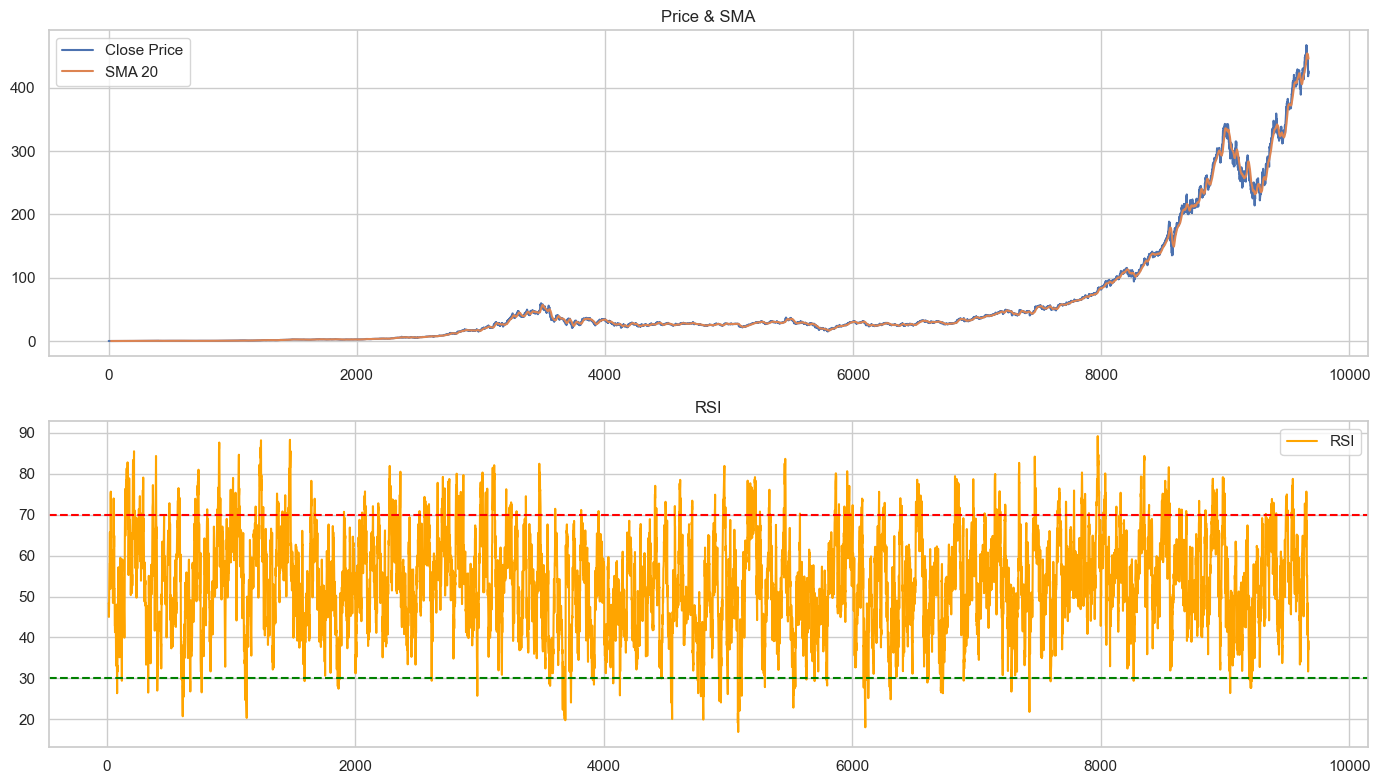

In [33]:
import matplotlib.pyplot as plt

# Visualize the indicators for MSFT
plt.figure(figsize=(14, 8))

# Price + SMA
plt.subplot(2, 1, 1)
plt.plot(data_msft['Close'], label='Close Price')
plt.plot(data_msft['SMA_20'], label='SMA 20')
plt.title("Price & SMA")
plt.legend()

# RSI + MACD
plt.subplot(2, 1, 2)
plt.plot(data_msft['RSI'], label='RSI', color='orange')
plt.title("RSI")
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.legend()

plt.tight_layout()
plt.show()

### Use PyNance for Financial Metrics